In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/MetacodeM/creditcard (1).csv", delimiter=',', dtype=np.float32)
data = data.dropna()

# 특성과 레이블 분리
X = data.drop(columns=['Class'])
y = data['Class']

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 훈련
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Mounted at /content/drive
Confusion Matrix:
 [[56851    13]
 [   34    64]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9991748885221726


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters:
 {'C': 1}
Confusion Matrix:
 [[56851    13]
 [   34    64]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Accuracy Score: 0.9991748885221726


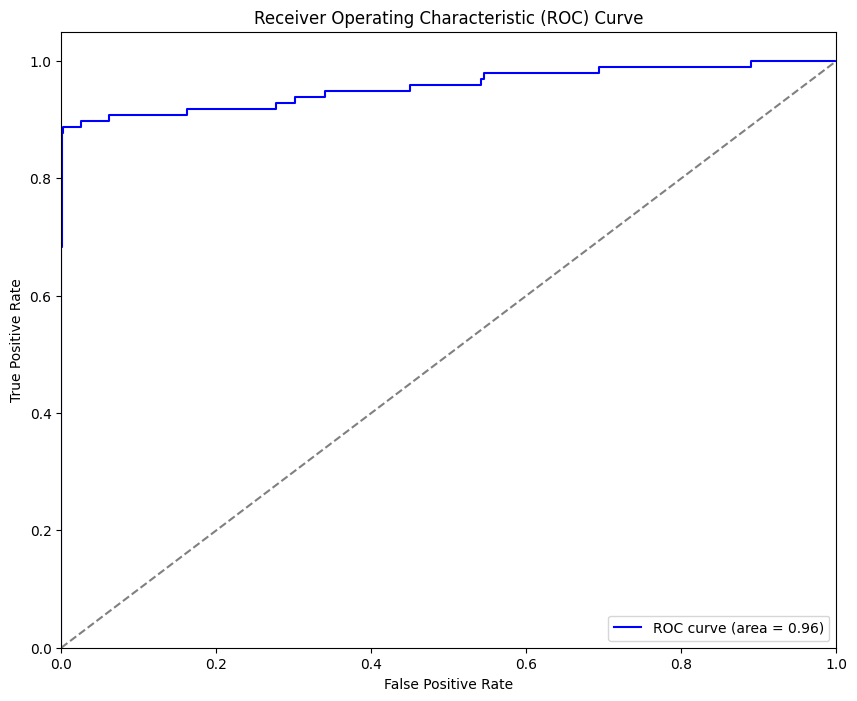

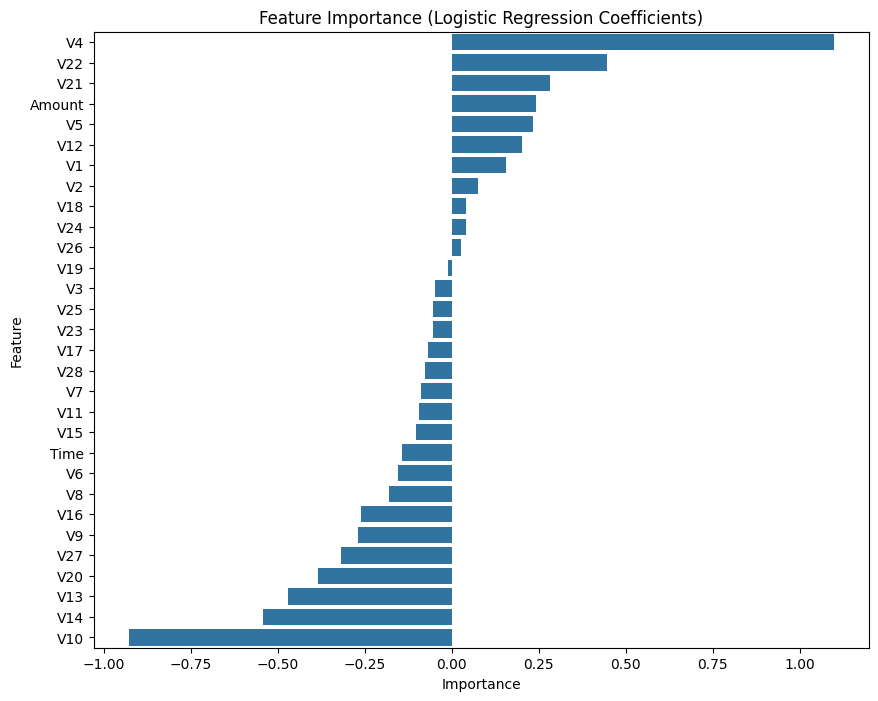

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/MetacodeM/creditcard (1).csv", delimiter=',', dtype=np.float32)
data = data.dropna()

# 특성과 레이블 분리 및 데이터 분할
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression 모델 및 하이퍼파라미터 그리드 설정
lr_model = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

# Grid Search
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터
best_params = grid_search.best_params_
print("Best Parameters:\n", best_params)

# 최적의 하이퍼파라미터로 모델 훈련
best_model = LogisticRegression(**best_params, max_iter=1000, random_state=42)
best_model.fit(X_train_scaled, y_train)

# 예측
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# 모델 평가
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 특성 중요도 시각화 (회귀 계수)
coefficients = best_model.coef_[0]
features = X.columns
importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
importance = importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()
